In [1]:
import numpy as np
import matplotlib.pyplot as plt

pt = 4/3
halfsize = (3, 3/1.618)
fullsize = (5, 5/1.618)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def potf(x):
    return 0*x

def potpot(x):
    return 0*x

def potq(x):
    return 10*x**2/2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

In [9]:
def do_sim(num_steps,num_traj,pot ,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    hist,bins = np.histogram(x,bins=50,density=True)
    fig,ax = plt.subplots(3,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    ax[2].plot(bins[:-1],hist)

In [4]:
x = do_sim(2000,500,potq)

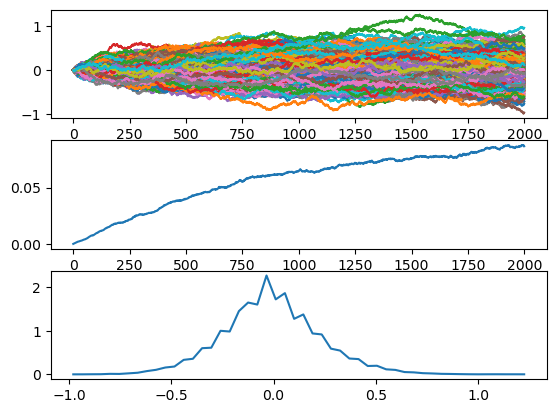

In [5]:
plot_sim(x)

# Histogram

In [6]:
x = do_sim(1000,5000,potq)

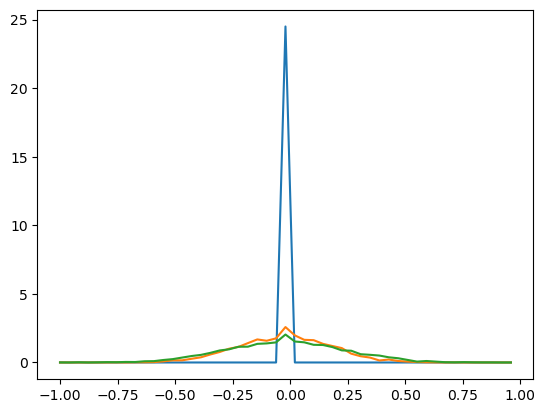

In [7]:
bins = np.linspace(-1, 1, 50)
times = range(x.shape[1])
extent=[
		0, x.shape[1], 
		bins[0], bins[-1]
	]

hist = np.array([np.histogram(i, bins, density=True)[0] for i in x])

plt.plot(bins[:-1], hist[1])
plt.plot(bins[:-1], hist[len(hist)//2])
plt.plot(bins[:-1], hist[-1])
plt.show()

/tmp/ipykernel_1235104/3579316942.py:2: RuntimeWarning: divide by zero encountered in log
  log_hist = np.log(hist)


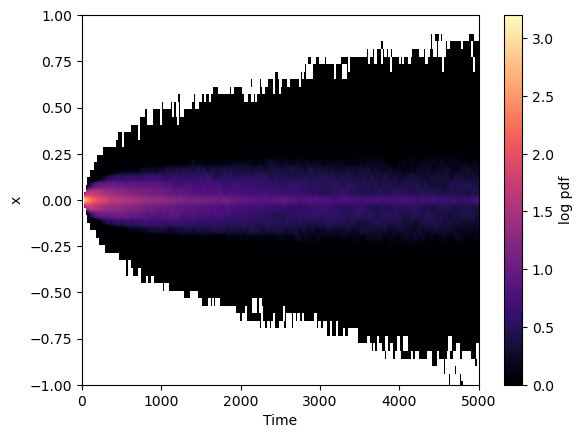

In [8]:
log_hist = hist
log_hist = np.log(hist)

plt.imshow(
	log_hist.T,
	aspect="auto",
	origin="lower",
	extent=extent,
	vmin=0,
	cmap="magma"
)
plt.colorbar(label="log pdf")

# plt.contour(log_hist.T, 10,
# 	extent=extent,
# 	color="white",
# )

plt.xlabel("Time")
plt.ylabel("x")
plt.show()